## Import Libraries

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
EPOCHS = 20

In [3]:
# Labels
LABELS = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [4]:
# upickle dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# get CIFAR10 dataset
def get_batch(batch):
    """
    :param batch: str, 'data_batch_1', ..., 'data_batch_5', 'test_batch'
    :return: dict
    """
    dct_copy = unpickle("cifar-10-batches-py/{}".format(batch))

    dct = dict()
    for key in dct_copy:
        dct[key.decode('utf-8')] = dct_copy[key]
    
    return dct


def get_all():
    """
    The function does the following:
    
    1. Reads all five batches and puts all images in an array
       x_train of shape (50000, 32, 32, 3).
    2. Reads the respective labels and puts them into an array
       y_train of shape (50000, 1).
    3. Reads the test batch and puts all images in an array
       x_test of shape (10000, 32, 32, 3).
    4. Reads the respective labels and puts them into an array
       y_test of shape (10000, 1)
        
    :return: x_train, y_train, x_text, y_test
    """
    
    train_batches = ['data_batch_{}'.format(x) for x in range(1, 6)]
    test_batch = 'test_batch'
    
    train_dct = [get_batch(x) for x in train_batches]
    test_dct = get_batch(test_batch)
    
    def flat_2_im(flat):
        im_r = flat[:1024].reshape((32, 32))
        im_g = flat[1024:1024+32*32].reshape((32, 32))
        im_b = flat[2048:2048+32*32].reshape((32, 32))

        im = np.zeros(shape=(32, 32, 3))
        im[:,:,0] = im_r
        im[:,:,1] = im_g
        im[:,:,2] = im_b

        im /= 255.
        
        return im
    
    # x_train
    x_train = np.zeros((50000, 32, 32, 3))
    n = 0
    for d in train_dct:
        # Get image i
        for i in range(d['data'].shape[0]):
            # Flat image to 32x32x3, normalized to 0...1
            flat = d['data'][i]
            im = flat_2_im(flat)
            
            # Add to x_train
            x_train[n, :, :, :] = im
            n += 1
    
    # y_train
    y_train = np.zeros((50000, 1))
    
    n = 0
    for d in train_dct:
        y_train[n:n+len(d['labels']), 0] = d['labels']
        n += len(d['labels'])
    
    # x_test
    x_test = np.zeros((10000, 32, 32, 3))
    
    for i in range(test_dct['data'].shape[0]):
        flat = test_dct['data'][i]
        im = flat_2_im(flat)
        x_test[i, :, :, :] = im
        
    # y_test
    y_test = np.array(test_dct['labels']).reshape((10000, 1))
    
    return x_train, y_train, x_test, y_test

## Collect training and test data

In [5]:
# initial variable train and test
x_train, y_train, x_test, y_test = get_all()

# One-hot label encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# TEST 1: Multilayer Perceptron (MLP)

In [6]:
# Multilayer Perceptron (MLP) for multi-class softmax classification:
# ===================================================================

model1 = Sequential()

model1.add(Flatten(input_shape=(32, 32, 3)))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


## Fitting MPL Based Model

In [7]:
hist1 = model1.fit(x_train, y_train,
                   epochs=EPOCHS,
                   batch_size=32,
                   validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 352s 7ms/step - loss: 2.0238 - accuracy: 0.2537 - val_loss: 1.8714 - val_accuracy: 0.3231
Epoch 2/20
50000/50000 [==============================] - 29s 579us/step - loss: 1.8838 - accuracy: 0.3161 - val_loss: 1.8119 - val_accuracy: 0.3423
Epoch 3/20
50000/50000 [==============================] - 19s 382us/step - loss: 1.8342 - accuracy: 0.3367 - val_loss: 1.7769 - val_accuracy: 0.3599
Epoch 4/20
50000/50000 [==============================] - 20s 405us/step - loss: 1.8066 - accuracy: 0.3477 - val_loss: 1.7314 - val_accuracy: 0.3780
Epoch 5/20
50000/50000 [==============================] - 19s 375us/step - loss: 1.7744 - accuracy: 0.3597 - val_loss: 1.7058 - val_accuracy: 0.3870
Epoch 6/20
50000/50000 [==============================] - 19s 386us/step - loss: 1.7573 - accuracy: 0.3691 - val_loss: 1.6779 - val_accuracy: 0.4015
Epoch 7/20
50000/50000 [==============================] -

## Evaluate the Model

In [8]:
score1 = model1.evaluate(x_test, y_test, batch_size=100)
score1

10000/10000 [==============================] - 2s 169us/step


[1.5847665166854858, 0.4390999972820282]

In [9]:
# Save/load
model1.save('models/model1')
model1 = keras.models.load_model('models/model1')

# Test 2: CNN

In [10]:
model2 = Sequential()

# Using Activation Function ReLu
model2.add(Conv2D(32, (3, 3), activation='relu',
                  input_shape=(32, 32, 3)))
model2.add(MaxPool2D())
model2.add(Flatten())
model2.add(Dense(10))

# Using Activation softmax
model2.add(Activation('softmax'))

# Using Optimizer adam
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                72010     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________


## Fitting CNN Based Model

In [11]:
hist2 = model2.fit(x_train, y_train,  # For faster training
                   epochs=EPOCHS,
                   batch_size=64,
                   validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 40s 805us/step - loss: 1.5672 - accuracy: 0.4520 - val_loss: 1.3346 - val_accuracy: 0.5368
Epoch 2/20
50000/50000 [==============================] - 36s 718us/step - loss: 1.2775 - accuracy: 0.5559 - val_loss: 1.2519 - val_accuracy: 0.5594
Epoch 3/20
50000/50000 [==============================] - 36s 711us/step - loss: 1.1768 - accuracy: 0.5922 - val_loss: 1.1905 - val_accuracy: 0.5875
Epoch 4/20
50000/50000 [==============================] - 36s 712us/step - loss: 1.1071 - accuracy: 0.6175 - val_loss: 1.1883 - val_accuracy: 0.5784
Epoch 5/20
50000/50000 [==============================] - 36s 713us/step - loss: 1.0534 - accuracy: 0.6377 - val_loss: 1.1046 - val_accuracy: 0.6210
Epoch 6/20
50000/50000 [==============================] - 35s 708us/step - loss: 1.0066 - accuracy: 0.6550 - val_loss: 1.0698 - val_accuracy: 0.6275
Epoch 7/20
50000/50000 [==============================] 

In [12]:
score2 = model2.evaluate(x_test, y_test, batch_size=100)
score2

10000/10000 [==============================] - 2s 250us/step


[1.046951295733452, 0.6513000130653381]

In [13]:
# Save/load (comment/uncomment relevant)
model2.save('models/model2')
model2 = keras.models.load_model('models/model2')

## Compare MLP and CNN

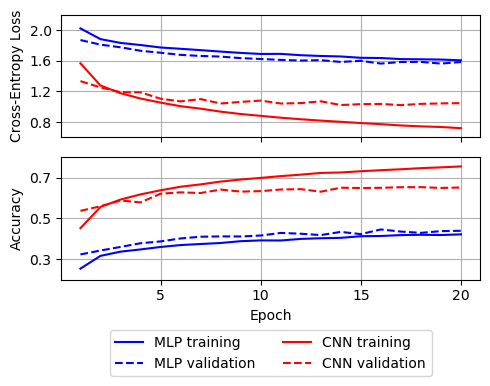

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(5,4), dpi=100, sharex=True)

x = np.arange(1, 1 + EPOCHS)

ax = axes[0]
ax.set_ylabel('Cross-Entropy Loss')
ax.set_ylim(0.6, 2.2)
ax.set_yticks(np.arange(0.8, 2.05, 0.4))
ax.grid()
ax.plot(x, hist1.history['loss'], 'b-', label='MLP training')
ax.plot(x, hist1.history['val_loss'], 'b--', label='MLP validation')
ax.plot(x, hist2.history['loss'], 'r-', label='CNN training')
ax.plot(x, hist2.history['val_loss'], 'r--', label='CNN validation')

ax = axes[1]
ax.set_xlabel('Epoch')
ax.set_xticks(np.array([0, 5, 10, 15, 20]));
ax.set_ylabel('Accuracy')
ax.set_ylim(0.2, 0.8)
ax.set_yticks(np.arange(0.3, 0.8, 0.2))
ax.grid()
ax.plot(x, hist1.history['accuracy'], 'b-', label='MLP training')
ax.plot(x, hist1.history['val_accuracy'], 'b--', label='MLP validation')
ax.plot(x, hist2.history['accuracy'], 'r-', label='CNN training')
ax.plot(x, hist2.history['val_accuracy'], 'r--', label='CNN validation')

ax.legend(bbox_to_anchor=(0.5, -0.6), ncol=2, loc='center')

fig.tight_layout()
fig.savefig('figs/training_vs_validation.png')

## Sample test pictures

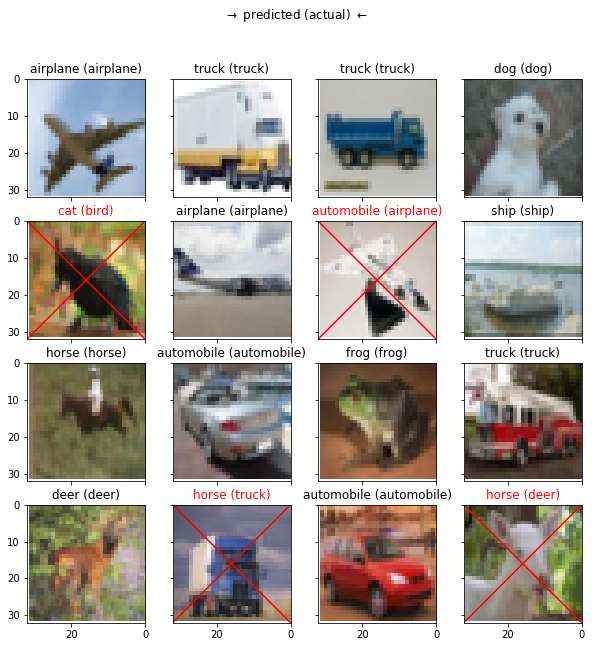

In [15]:
# Sample test data
ix = np.random.randint(0, 10000, size=16)
ex_im = x_test[ix]
ex_lb = y_test[ix]

# Predict
out = model2.predict(ex_im)
classes = np.argmax(out, axis=1)  # softmax output -> class

# Plot
fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True);
fig.suptitle(r'$\rightarrow$ predicted (actual) $\leftarrow$')

k = 0
for i in range(4):
    for j in range(4):
        # Switch Axes
        ax = axes[i, j]
        
        # Show image
        ax.imshow(ex_im[k]);
        
        # Determine labels
        actual_lab = LABELS[np.argmax(ex_lb[k])]
        pred_lab = LABELS[classes[k]]
        
        # Format title
        title = "{} ({})".format(pred_lab, actual_lab)
        title_color = 'black'
        
        # Mark image if wrong prediction
        if actual_lab != pred_lab:
            ax.plot(np.array([0, 32]), np.array([0, 32]), 'r-')
            ax.plot(np.array([0, 32]), np.array([32, 0]), 'r-')
            title_color = 'red'

        # Set title
        ax.set_title(title, color=title_color);
        
        # Set limits
        ax.set_xlim(32, 0)
        ax.set_ylim(32, 0)
            
        k += 1

fig.savefig('figs/exemplary_images.png')

## Which class is the most difficult to predict?

In [16]:
# Predict using all test data
out = model2.predict(x_test)
prd = np.argmax(out, axis=1)

# Get actual labels
act = np.argmax(y_test, axis=1)

# Identify correct predictions
correct_ix = prd == act

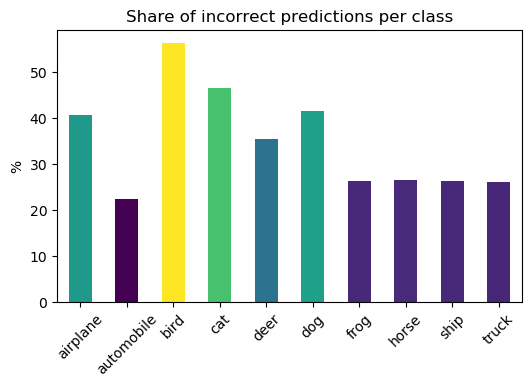

In [17]:
# Count incorrect labels
incorrect = act[np.invert(correct_ix)]
incorrect_count = pd.Series([LABELS[x] for x in incorrect]).value_counts()
tot_number = pd.Series([LABELS[x] for x in act]).value_counts()
incorrect_share = (incorrect_count / tot_number) * 100.

# Generate and normalize color map
norm = matplotlib.colors.Normalize(vmin=np.min(incorrect_share),
                                   vmax=np.max(incorrect_share))
colors = matplotlib.cm.viridis(list(map(norm, incorrect_share)))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)
incorrect_share.plot(kind='bar', ax=ax, color=colors, rot=45);
ax.set_title('Share of incorrect predictions per class');
ax.set_ylabel('%');

plt.subplots_adjust(bottom=0.2)

fig.savefig('figs/incorrect_share.png')